In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def b_gen():
    bingo = ['L','O','V','E']
    board = []
    for num, letter in enumerate(bingo):
        row = []
        row.append(np.random.choice(range(1,13), 4, replace=False) + num*12)
        board.append(row)
    return np.array(board).transpose().reshape(4,-1)

In [5]:
b_gen()

array([[ 7, 14, 27, 44],
       [ 6, 22, 30, 45],
       [ 1, 17, 31, 47],
       [ 5, 19, 32, 43]])

In [6]:
def bingo_caller(size=1):
    bingo = [0,1,2,3]
    random_array = np.random.choice(range(1,49), size=size, replace=False)
    for number in random_array:
        if number in range(1,13):
            letter = bingo[0]
        elif number in range(13,25):
            letter = bingo[1]
        elif number in range(25,37):
            letter = bingo[2]
        else:
            letter = bingo[3]
        return letter, number

In [7]:
bingo_caller()

(3, 43)

In [104]:
k = 100000
counts = np.zeros(k) # counter for how many trials until win

for i in range(k):
    card = b_gen()
    empty_card = np.zeros((4,4))
    calls = [] # list of all calls

    while ~(empty_card.sum(axis=0)==4).any() or ~(empty_card.sum(axis=1)==4).any():
        number = np.random.choice(range(1,49))
        if number not in calls:
            calls.append(number)
            counts[i] += 1
        if (card == number).any():
            x,y = np.where(card == number)
            empty_card[x,y] = True

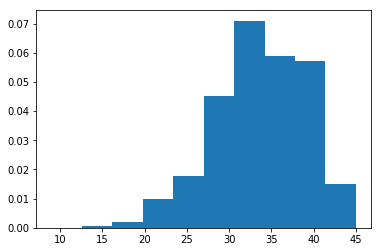

In [105]:
plt.hist(counts, normed=True)
plt.show()

In [108]:
print np.mean(counts), np.median(counts)

33.59453 34.0


In [109]:
values, base = np.histogram(counts, bins=48)
F = np.cumsum(values)/float(k)
F_m = 1 - (1-F)**16
E = 1 + sum(1-F_m)
E

19.434267379250567

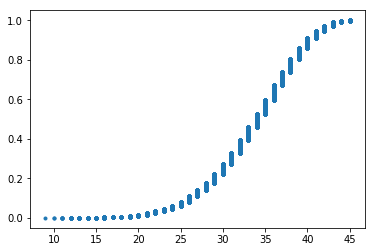

In [111]:
x = np.sort(counts)
y = np.arange(1,len(counts)+1)/float(len(counts))
plt.plot(x,y, marker='.', linestyle='none')
plt.show()

In [91]:
def bingo_caller2(size=26):
    bingo = ['L','O','V','E']
    random_array = np.random.choice(range(1,49), size=size, replace=False)
    for number in random_array:
        if number in range(1,13):
            letter = bingo[0]
        elif number in range(13,25):
            letter = bingo[1]
        elif number in range(25,37):
            letter = bingo[2]
        else:
            letter = bingo[3]
        print letter, number

In [92]:
bingo_caller2()

E 43
L 8
V 32
O 23
O 17
V 34
O 22
O 13
L 1
L 3
O 20
V 26
L 7
E 44
V 28
O 24
O 16
V 33
L 9
E 48
V 30
V 31
E 47
L 11
E 39
E 45
